# **BCB546X: Python_Assignment** #
### Jialu Wei ###
--------------------------------


# FUNCTIONS #


## 1 ##
Document Dr. X's function with comments and with markdown text in your Jupyter notebook.

In [1]:
from Bio import SeqIO
def get_sequences_from_file(fasta_fn): # define a function named get_sequences_from_file()
    sequence_data_dict = {} # create an empty dictionary 
    for record in SeqIO.parse(fasta_fn, "fasta"): # do a loop for each record splited from input file using SeqIO.parse() one by one
        description = record.description.split() # extract the descrptiions section from the record and split them, saved in list named description 
        species_name = description[1] + " " + description[2] # join the second and third items in description together with seperation as "", save as species_name 
        sequence_data_dict[species_name] = record.seq # use species_name as key, sequence from record as the assigned value, save into dictionary of sequence_data_dict
    return(sequence_data_dict) # after loop, return sequence_data_dict as result of the function
# basically, this function is to label each sequence in the input file with the according species name

###### Test this function 

In [2]:
test_func1 = get_sequences_from_file("bears_cytb.fasta")
test_func1 

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...A

## 2 ##
Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.

In [3]:
from Bio.Data import CodonTable 
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # get the codontable
    aa = ""
    aa_seq_string = ""
    for i in range(0,len(string_nucleotides),3): #read codens from every 3rd position
        coden = string_nucleotides[i:i+3] #read the continueous 3 nucleic acid as coden
        if coden not in mito_table.stop_codons: 
            aa = mito_table.forward_table[coden] 
            aa_seq_string += aa # add new amino acid to the aa_seq_string
        else: #stop when it comes to the stop coden
            return(aa_seq_string)

###### Test this function

In [4]:
test_dna_seq = test_func1['Ursus arctos'] # get a dna seq for future testing
test_func2 = translate_function(test_dna_seq)
test_func2

C:\Users\jlwei\AppData\Local\Continuum\anaconda3\lib\site-packages\Bio\Seq.py:163: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


'MTNIRKTHPLAKIINNSLIDLPTPSNISAWWNFGSLLGVCLILQILTGLFLAMHYTPDTTTAFSSVTHICRDVHYGWVIRYVHANGASIFFICLFMHVGRGLYYGSYLFSETWNIGIILLFTIMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTDLVEWIWGGFSVDKATLTRFFAFHFILPFIILALAAVHLLFLHETGSNNPSGIPSDSDKIPFHPYYTIKDILGALLLALTLATLVLFSPDLLGDPDNYTPANPLSTPPHIKPEWYFLFAYAILRSIPNKLGGVLALIFSILILAIIPLLHTSKQRGMMFRPLSQCLFWLLVADLLTLTWIGGQPVEHPFIIIGQLASILYFTILLVLMPIAGIIENNLLKW'

###### Print and see how `CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]` works

In [5]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [6]:
mito_table.stop_codons

['TAA', 'TAG', 'AGA', 'AGG']

## 3 ##

Write an alternative translation function.

In [7]:
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
def translate_dna(dna_sequence):
    dna_seq = Seq(dna_sequence)
    protein_seq = dna_seq.translate(table = 2, to_stop = True)
    return protein_seq

###### Test this function

In [8]:
test_func3 = translate_dna(str(test_dna_seq))
test_func3

Seq('MTNIRKTHPLAKIINNSLIDLPTPSNISAWWNFGSLLGVCLILQILTGLFLAMH...LKW', ExtendedIUPACProtein())

###### Test these two functions have same result

In [9]:
str(test_func3) == test_func2

True

## 4 ##
Write a function that calculates the molecular weight of each amino acid sequence.

In [10]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import molecular_weight

In [11]:
def compute_molecular_weight(aa_seq): #note that the input is amino acid sequence but not dna sequence
    analysis_seq = ProteinAnalysis(aa_seq)
    weight = analysis_seq.molecular_weight()
    return(weight)

###### Test this function

In [12]:
test_aa_seq = test_func2 
test_func4 = compute_molecular_weight(test_func2)
test_func4

42414.743499999975

## 5 ##
Write a function that computes the GC-content of each DNA sequence.

In [13]:
def gc_content(dna_sequence):
    na_bases = dna_sequence.count('n')+dna_sequence.count('N') # Count the number of nucleic acid in sequence except for ATCG, i.e. n & N
    gc_percent = float(dna_sequence.count('C')+dna_sequence.count('G'))*100.0/(len(dna_sequence)-na_bases) # remove n/N from total number and calculate the GC content
    return gc_percent

###### Test this function

In [14]:
test_func5 = gc_content(test_dna_seq)
test_func5

43.771929824561404

###### Check result with some known function

In [15]:
from Bio.SeqUtils import GC
GC(test_dna_seq)
GC(test_dna_seq) == test_func5

True

# Main #

###### Read data

In [18]:
import pandas as pd
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") #get sequence from file with our function
bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 
species_list = list(bears_df.species)

## 6 ##

In [19]:
bears_df # Inspect the date

,species,mass
0,Ursus spelaeus,550.800
1,Ursus arctos,203.500
2,Ursus thibetanus,99.714
3,Melursus ursinus,100.030
4,Ursus americanus,110.560
5,Helarctos malayanus,47.020
6,Ailuropoda melanoleuca,118.200
7,Tremarctos ornatus,140.700
8,Ursus maritimus,425.100


###### Add two new columns to the bears DataFrame: 

###### (1) molecular weight 

###### (2) GC content

In [20]:
bears_df['molecular_weight'] = 'NaN' # add `molecular_weight`
bears_df['GC_content'] = 'NaN' # add `GC_content`
bears_df

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


## 7 ##

Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame

In [21]:
cytb_seqs #inspect data

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...A

###### So, `cytb_seqs` is a dictionary with `species name` as keys and `DNA sequence` as values

In [22]:
index = 0 #set our index as 0, which means we'll do the loop later to fill the dataframe from very first row
for key,value in cytb_seqs.items():
    aa_seq = translate_function(str(value)) #translate each sequence into amino acid string
    molecular_weight = compute_molecular_weight(aa_seq) # compute the molecular_weight with our defined function
    GC_content = gc_content(str(value)) #compute the GC_content with our defined function
    bears_df.set_value(index,'GC_content',GC_content) #put value into cell in column named "GC_content" in this index
    bears_df.set_value(index,'molecular_weight',molecular_weight) 
    index +=1 #go to the next index
print(bears_df)


                  species     mass molecular_weight GC_content
0          Ursus spelaeus  550.800          42458.8    43.7719
1            Ursus arctos  203.500          42414.7    43.7719
2        Ursus thibetanus   99.714          42306.7     45.614
3        Melursus ursinus  100.030            42552    45.1754
4        Ursus americanus  110.560          42427.7    43.9474
5     Helarctos malayanus   47.020          42560.9    44.2982
6  Ailuropoda melanoleuca  118.200          42702.2    40.7895
7      Tremarctos ornatus  140.700          42384.8     44.386
8         Ursus maritimus  425.100          42454.8    44.2982


C:\Users\jlwei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\jlwei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


## 8 ##
Plot a bar-chart of the mass with the x-axes labeled with species names.

In [23]:
import seaborn as sns

Text(0.5,1,' Mass vs bear species')

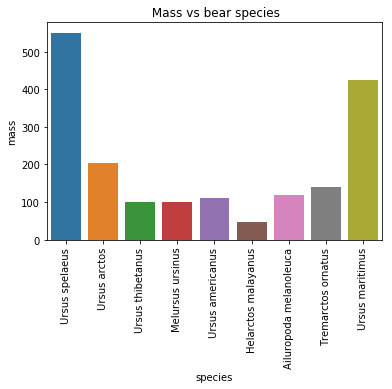

In [24]:
Fig1 = sns.barplot(x = 'species', y= 'mass', data = bears_df) # plot using seaborn
Fig1.set_xticklabels(labels = bears_df.species, rotation= 90,)
Fig1.set_title(' Mass vs bear species')

##### Q1 What is the largest bear species? #####
According to the plot, `Ursus spelaeus` has the most mass, whcih is the largest bear species.
##### Q2 What else is interesting about this species? #####
The largest species (~550) has more than 10 times mass with the smallest species (~50).


## 9 ## 
Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

C:\Users\jlwei\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


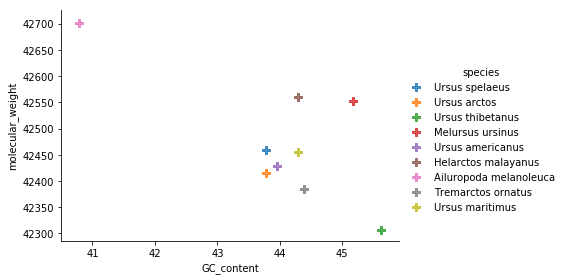

In [25]:
sns.lmplot("GC_content", "molecular_weight", data=bears_df, fit_reg=False, size=4,aspect=1.5, scatter_kws={'alpha':0.8,"s": 50}, hue='species', markers='P')

## 10 ##
Save the new DataFrame to a file called "bears_mass_cytb.csv"

In [26]:
bears_df.to_csv('bears_mass_cytb.csv', sep=',',index=False, encoding='utf-8', )

In [27]:
bears_df

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,42458.8,43.7719
1,Ursus arctos,203.500,42414.7,43.7719
2,Ursus thibetanus,99.714,42306.7,45.614
3,Melursus ursinus,100.030,42552,45.1754
4,Ursus americanus,110.560,42427.7,43.9474
5,Helarctos malayanus,47.020,42560.9,44.2982
6,Ailuropoda melanoleuca,118.200,42702.2,40.7895
7,Tremarctos ornatus,140.700,42384.8,44.386
8,Ursus maritimus,425.100,42454.8,44.2982


# BONUS #

#### We are going to blast each sequence from `bears_cytb.fasta` with loop.
##### Please note that since there are 9 sequences to be blasted, it may take some time to get the result if you rerun it. Thanks!


In [28]:
from Bio.Blast import NCBIWWW
from Bio import SeqIO

In [29]:
cytb_seqs

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...A

###### blast with bears_cytb and save in `xml` file

In [ ]:
query = list(SeqIO.parse("bears_cytb.fasta","fasta")) #read multiple seq as queries
blast_file = open("my_blast_bonus.xml", "w") # create an xml output file
for species in query: # loop for each seq to do blast
    result_handle = NCBIWWW.qblast("blastn","nt",species.seq)
    blast_result = result_handle.read()
    blast_file.write(blast_result) # write the blast result into xml file
blast_file.close() # tidy up
result_handle.close()

###### read blast result from `xml` file

In [ ]:
from Bio.Blast import NCBIXML 
E_VALUE_THRESH = 1e20
for record in NCBIXML.parse(open("my_blast_test.xml")):
    if record.alignments : #skip queries with no matches
        print("QUERY: %s" % record.query[:60])
for align in record.alignments:
    for hsp in align.hsps:
        if hsp.expect < E_VALUE_THRESH:
            print("MATCH: %s " % align.title[:60])
            print(hsp.expect)